# Imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

# Scrape Yahoo Finance Data

In [11]:
# ticker list and create dataframe for 1yr performance of stock data

tickers = ['QQQ', 'TSLA', 'AAPL', 'MSFT', 'AMD', 'PYPL', 'NVDA', 'FB', 'CRWD', 'AMZN'] #ticker list

df = yf.download(tickers, period="1d", start="2021-01-01", end="2022-01-01") # yahoo finance

adj_close = df['Adj Close']

[*********************100%***********************]  10 of 10 completed


# Calculate Daily Change, Covariance Matrix, Average Return per Stock

In [12]:
#daily change
dailyChange = adj_close.pct_change()

#covariance matrix
cov_matrix = dailyChange.cov()

#average return
avgReturn = dailyChange.mean()

In [25]:
weight = np.repeat(.1, 10) # Each stock has 10% weighting
port_mean = avgReturn @ weight
port_std = np.sqrt(weight.T @ cov_matrix @ weight)

# Calculate Portfolio Mean, Portfolio Std Dev, and Average Return per Stock

In [49]:
print("Portfolio Mean :", port_mean)
print("Portfolio Std Dev :", port_std)

print("Average Return per Stock : \n", avgReturn)

Portfolio Mean : 0.0013507747528412042
Portfolio Std Dev : 0.015940423258881505
Average Return per Stock : 
 AAPL    0.001409
AMD     0.002128
AMZN    0.000295
CRWD    0.000541
FB      0.001064
MSFT    0.001855
NVDA    0.003625
PYPL   -0.000558
QQQ     0.001088
TSLA    0.002061
dtype: float64


# Normal Distribution of Portfolio Returns

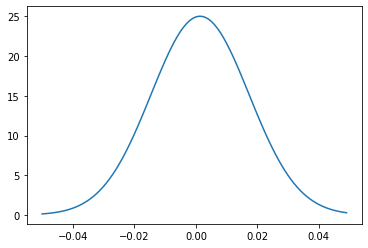

In [50]:
x = np.arange(-.05,.05,.001)
norm_dist = norm.pdf(x,port_mean,port_std)
plt.plot(x, norm_dist)
plt.show()

# Value at Risk Calculation at 95% confidence interval

In [52]:
alpha = .05
VaR = norm.ppf(alpha, port_mean, port_std)
print("Value at Risk ", VaR)

Value at Risk  -0.024868888259671654
